In [1]:
import sys
sys.path.append('..')  # 添加上级目录到搜索路径
from utils import *

In [2]:
filename = ["Blogs", "Metabolic", "Drosophila", "Music", "Airports", "Proteome",\
            "USpowergrid", "Gnutella", "Words", "DBLP", "Internet", "Enron"]

fig_labels = [r"\textbf{(a)}", r"\textbf{(b)}", r"\textbf{(c)}", r"\textbf{(d)}", r"\textbf{(e)}", \
              r"\textbf{(f)}", r"\textbf{(g)}", r"\textbf{(h)}", r"\textbf{(i)}", r"\textbf{(j)}", \
              r"\textbf{(k)}", r"\textbf{(l)}"]

# 设定移除节点比例
q = np.linspace(0, 0.9, 10)

Blogs:  1222 16714
Blogs: 27.3552
Metabolic:  1436 4718
Metabolic: 6.5710
Drosophila:  1770 8905
Drosophila: 10.0621
Music:  2476 20624
Music: 16.6591
Airports:  3397 19230
Airports: 11.3218
Proteome:  4100 13358
Proteome: 6.5161
USpowergrid:  4941 6594
USpowergrid: 2.6691
Gnutella:  6301 20777
Gnutella: 6.5948
Words:  7377 44205
Words: 11.9845
DBLP:  12591 49635
DBLP: 7.8842
Internet:  23748 58414
Internet: 4.9195
Enron:  33696 180811
Enron: 10.7319


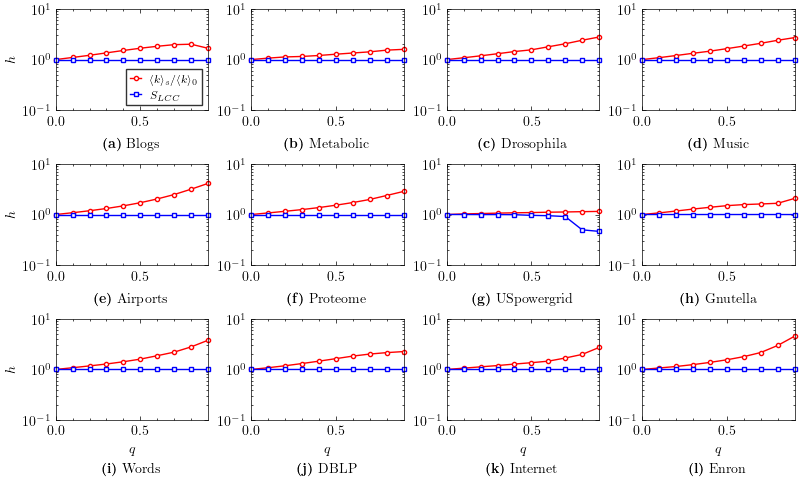

In [3]:
fig, axs = plt.subplots(3, 4, figsize=(8, 4.8), constrained_layout=True)
for net_label in range(12):
    G = load_graph_data(filename[net_label])
    N, M = nx.number_of_nodes(G), nx.number_of_edges(G)
    print(filename[net_label] + ": ", N, M)
    avk0 = 2*M/N
    print(filename[net_label] + ": " + f"{avk0:.4f}")

    DC_plus = cal_DC_plus(G)
    sequence = dict(sorted(DC_plus.items(), key=lambda x: x[1], reverse=False))

    y1, y2 = cal_avk_S_LCC(G, sequence, N, q, avk0)

    ax = axs[net_label//4, net_label%4]
    ax.plot(q, y1, color = 'red', marker = 'o', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label=r"$\langle k \rangle_s / \langle k \rangle_0$")
    ax.plot(q, y2, color = 'blue', marker = 's', markersize = 3.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$S_{LCC}$")
    ax.set_xlim(0, q[-1])
    ax.set_ylim(1e-1, 1e1)
    ax.set_yscale("log")
    if net_label >=8:
        ax.set_xlabel("$q$")
        ax.set_title(fig_labels[net_label]+" "+filename[net_label], loc='center', y=-0.6, fontsize=10)
    else:
        ax.set_title(fig_labels[net_label]+" "+filename[net_label], loc='center', y=-0.45, fontsize=10)
    if net_label%4 == 0:
        ax.set_ylabel("$h$")
    if net_label == 0:
        ax.legend(loc=4, edgecolor = "black", handlelength=1.0, columnspacing=0.5, fontsize=8, frameon=True, fancybox=False)

plt.savefig("Fig3.pdf")
plt.show()